In [1]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
from pylab import mpl, plt

In [2]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [3]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [4]:
ativo_analise = 'WDOH22'
df_analise = mt5.copy_ticks_from(ativo_analise, datetime(2022, 1, 2),100000000, mt5.COPY_TICKS_ALL)
df_analise = pd.DataFrame(df_analise)
df_analise['time'] = pd.to_datetime(df_analise['time'], unit='s')
df_analise.drop(['flags', 'time_msc', 'volume_real'], axis = 1, inplace=True)
df_analise.set_index('time', inplace=True)
df_analise['M1000'] = ta.sma(df_analise['last'], length=1000)
df_analise['M5000'] = ta.sma(df_analise['last'], length=5000)
df_analise['M10000'] = ta.sma(df_analise['last'], length=10000)
df_analise

,bid,ask,last,volume,M1000,M5000,M10000
time,,,,,,,
2022-01-03 09:03:00,0.0,5728.0,0.0,0,NaN,NaN,NaN
2022-01-03 09:03:59,5673.0,5728.0,0.0,0,NaN,NaN,NaN
2022-01-03 09:04:06,0.0,5728.0,0.0,0,NaN,NaN,NaN
2022-01-03 09:04:29,0.0,5700.0,0.0,0,NaN,NaN,NaN
2022-01-03 09:04:56,0.0,5675.0,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-07 18:29:59,5290.5,5294.0,5289.5,3,5289.586,5288.8880,5287.98805
2022-02-07 18:29:59,5290.5,5294.0,5289.0,6,5289.586,5288.8883,5287.98810
2022-02-07 18:29:59,5289.0,5294.5,5289.0,6,5289.586,5288.8886,5287.98815


In [5]:
#inicialmente teste com 1000ticks
df_analise['Dist1k'] = df_analise['last']-df_analise['M1000'] 
df_analise['Dist5k'] = df_analise['last']-df_analise['M5000']
df_analise['Dist10k'] = df_analise['last']-df_analise['M10000']

In [6]:
df_analise['timeframe'] = df_analise.index
df_analise['timeframe'] = df_analise['timeframe'].astype(str)
df_analise.dtypes

bid          float64
ask          float64
last         float64
volume        uint64
M1000        float64
M5000        float64
M10000       float64
Dist1k       float64
Dist5k       float64
Dist10k      float64
timeframe     object
dtype: object

In [7]:
df_analise['Ano'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[0].split('-')[0]))
df_analise['Mes'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[0].split('-')[1]))
df_analise['Dia'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[0].split('-')[2]))
df_analise['Hora'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[1].split(':')[0]))
df_analise['Min'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[1].split(':')[1]))
df_analise['Seg'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[1].split(':')[2]))

In [8]:
df_analise.tail()

,bid,ask,last,volume,M1000,M5000,M10000,Dist1k,Dist5k,Dist10k,timeframe,Ano,Mes,Dia,Hora,Min,Seg
time,,,,,,,,,,,,,,,,,
2022-02-07 18:29:59,5290.5,5294.0,5289.5,3,5289.586,5288.8880,5287.98805,-0.086,0.6120,1.51195,2022-02-07 18:29:59,2022,2,7,18,29,59
2022-02-07 18:29:59,5290.5,5294.0,5289.0,6,5289.586,5288.8883,5287.98810,-0.586,0.1117,1.01190,2022-02-07 18:29:59,2022,2,7,18,29,59
2022-02-07 18:29:59,5289.0,5294.5,5289.0,6,5289.586,5288.8886,5287.98815,-0.586,0.1114,1.01185,2022-02-07 18:29:59,2022,2,7,18,29,59
2022-02-07 19:30:00,0.0,0.0,5289.0,6,5289.586,5288.8888,5287.98825,-0.586,0.1112,1.01175,2022-02-07 19:30:00,2022,2,7,19,30,0
2022-02-07 21:00:07,0.0,0.0,5289.0,6,5289.586,5288.8890,5287.98835,-0.586,0.1110,1.01165,2022-02-07 21:00:07,2022,2,7,21,0,7


In [9]:
df_analise.Dia.value_counts()

3     255863
1     249430
7     246687
4     236511
31    231550
2     231135
28     29378
27     18329
21     10131
26      9435
19      8821
20      8418
24      8132
18      8100
25      6023
5       4578
13      4065
6       4064
14      3760
12      3648
10      3119
11      2750
17      2390
Name: Dia, dtype: int64

In [10]:
df = df_analise[df_analise['volume'] > 0]

In [11]:
# filtro do das 9 horas
df = df[df['Hora'] == 9]
df = df[df['Min'] > 15]
df.dropna(inplace=True)
#df = df[df['Dist1k'] < 40]

In [12]:
df.Hora.value_counts()

9    169454
Name: Hora, dtype: int64

In [13]:
def percentil(data, up=90, down=10):
    x = data
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

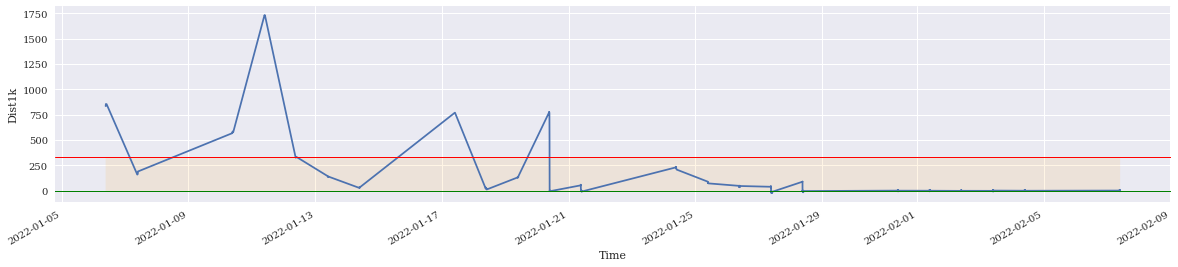

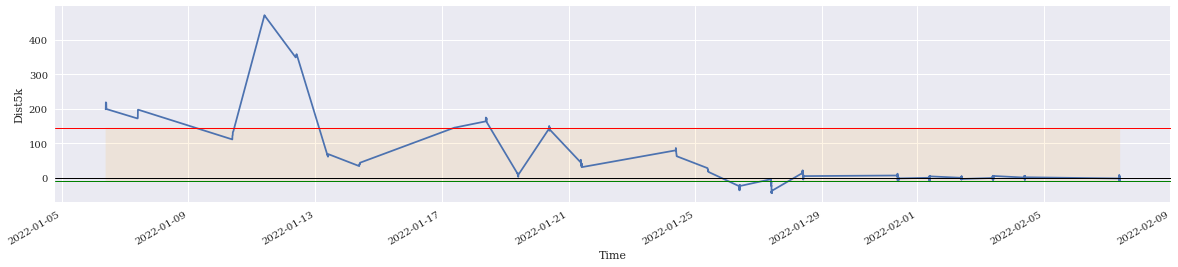

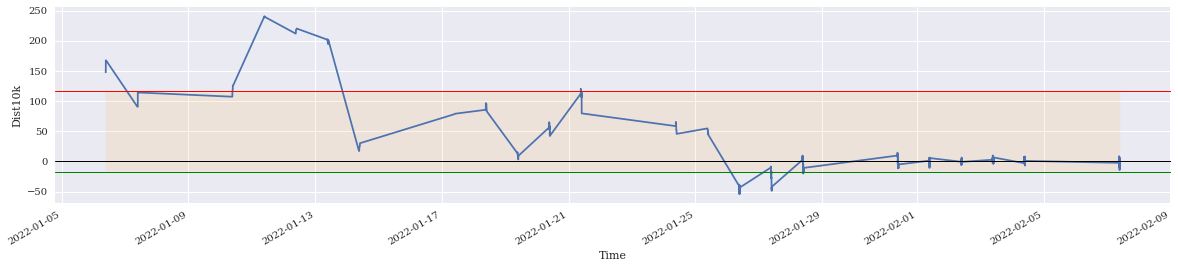

In [14]:
plt.rcParams['figure.figsize'] = (20,4)

per_dist1k = percentil(df['Dist1k'], up=99, down=1)
ax = df['Dist1k'].plot()
ax.fill_between(df.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist1k')
plt.show()

per_dist5k = percentil(df['Dist5k'], up=99, down=1)
ax = df['Dist5k'].plot()
ax.fill_between(df.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist5k')
plt.show()

per_dist10k = percentil(df['Dist10k'], up=99, down=1)
ax = df['Dist10k'].plot()
ax.fill_between(df.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist10k')
plt.show()

In [15]:
df['Dist1k'].describe()

count    169454.000000
mean         10.870626
std          88.691732
min         -24.265500
25%          -1.176500
50%           0.027500
75%           1.313000
max        1731.244000
Name: Dist1k, dtype: float64

In [16]:
df['Dist5k'].describe()

count    169454.000000
mean          3.725269
std          28.215531
min         -44.109000
25%          -2.385400
50%          -0.151000
75%           2.824175
max         471.341800
Name: Dist5k, dtype: float64

In [17]:
df['Dist10k'].describe()

count    169454.000000
mean          2.689790
std          21.459395
min         -54.419800
25%          -3.040737
50%           0.062250
75%           3.609300
max         240.635850
Name: Dist10k, dtype: float64